# Exercise 1 on Clustering and Local PCA

The goal of the exercise is to perform perform clustering on a dataset representing a noisy 2D non-linear function.
* How do we select the correct number of clusters?
* Why LPCA works better than PCA on a non-linear dataset?

First thing, we create our synthetic dataset

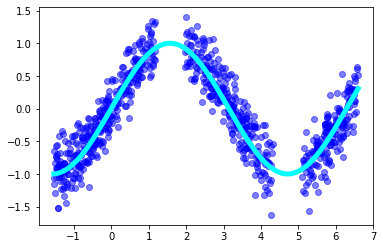

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

def non_linear_func_orig(x):
    y = np.sin(x)
    return y

def non_linear_func(x):
    y = np.sin(x) + 0.25*np.random.randn(x.size) 
    return y
    
# This code is used to create our synthetic dataset
size = 1000
seed = 42
np.random.seed(seed)

x = np.random.rand(size) * 2.6*np.pi - np.pi/2
y = non_linear_func(x)

limits = [np.pi/2, 3/2*np.pi]
eps = np.pi/8

mask = ((x < limits[0] + eps) & (x > limits[0] - eps)) | (x < limits[1] + eps) & (x > limits[1] - eps)
x = x[~mask]
y = y[~mask]

X = np.zeros((x.size, 2))
X[:,0] = x
X[:,1] = y

x_orig = np.linspace(x.min(), x.max(), 200)
y_orig = np.sin(x_orig)

# We can plot the dataset and the original non-linear function
plt.scatter(X[:,0], X[:,1], c='b', alpha=0.5)
plt.plot(x_orig, y_orig, c='cyan', lw=5)
plt.show()


## Global PCA
Now we apply the PCA and try to reconstruct the dataset using only one dimension.

In [8]:
# We import the PCA object from the sklearn package
from sklearn.decomposition import PCA

# to do: apply PCA to the dataset and plot the original dataset along with the reconstructed dataset 
#        using only one PC   

# hint: the documentation and examples to use the PCA object are at:
#       https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


## Clustering

We can try and improve the reconstruction accuracy using a local approach. The first thing to do is then to cluster the dataset using kmeans.

In [9]:
# We import the KMEANS object from the sklearn package
from sklearn.cluster import KMeans

# to do: use the KMeans object to obtain the clusters labels. Use a number of clusters of your choice.
#        plot the dataset and colour it by the value of the label. 

# hint: the documentation and examples to use the KMeans object are at:
#       https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html




# Uncomment the lines below when you have calculated the clusters' labels.
#plt.scatter(X[:,0], X[:,1], c=labels)
#plt.show()


## Selection of the clusters' number

In this case we can visually identify the number of clusters, because we have only two dimensions. In higher dimensions, it is not possible to visualize the dataset. Also, we would prefer to have an automatic method to select the correct number of clusters.

We can use the Devies Bouldin score to estimate the number of clusters.


In [10]:
from sklearn.metrics import davies_bouldin_score

# to do: calculate the DB score for a range of k (number of clusters) that goes from 2 to 10. 
#        Plot the DB score as a function of k.

# hint: to calculate the DB score you can use the function davies_bouldin_score
#       https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html
#       you can use a for cycle to calculate the DB for different k.


## Local PCA

Now we can apply the PCA in each cluster.

In [11]:
# to do: apply PCA for each cluster, then plot the reconstruction using only the first PC.

# hint: - use a for cycle to apply the PCA for each cluster. 
#       - to select only the data of a single cluster use a mask:
#           mask = (labels == 0)
#           X = X[mask]
#         This will select only the data with label 0
#       - To get the correct reconstruction, you need to center the data in each cluster 
#         before applying the PCA, and then de-center the data:
#            Xc = X - np.mean(X, axis=0) 
#            pca.fit(Xc)
#            A = pca.components_.T
#            Z = Xc @ A
#            X_rec = Z[:,:q] @ A[:,:q].T + np.mean(X, axis=0)
            

## Local PCA with VQPCA

We can compare the KMEANS results with VQPCA. To perform VQPCA, we need the [OpenMORe](https://github.com/burn-research/OpenMORe) library. You can find the instruction for the installation in the README document. 

In [12]:
import OpenMORe.clustering as clustering

# This is a dictionary used to set the VQPCA parameters.
settings_clustering = {
    #centering and scaling options
    "center"                    : True,
    "centering_method"          : "mean",
    "scale"                     : True,
    "scaling_method"            : "auto",

    #set the initialization method (random, observations, kmeans, pkcia, uniform)
    "initialization_method"     : "random",

    #set the number of clusters and PCs in each cluster
    "number_of_clusters"        : 3,
    "number_of_eigenvectors"    : 1,

    #enable additional options:
    "correction_factor"         : "off",    # --> enable eventual corrective coefficients for the LPCA algorithm:
                                            #     'off', 'c_range', 'uncorrelation', 'local_variance', 'phc_multi', 'local_skewness' are available

    "classify"                  : False,    # --> call the method to classify a new matrix Y on the basis of the lpca clustering
    "write_on_txt"              : False,    # --> write the idx vector containing the label for each observation
    "evaluate_clustering"       : True,     # --> enable the calculation of indeces to evaluate the goodness of the clustering
    "neighbors_number"          : 0,
}

# To do: follow the example in 
# https://github.com/burn-research/OpenMORe/blob/master/examples/clustering/vectorQuantizationClass.py
# to find the vqpca labels, then plot the clusters